# Intro ML Homework 3
## Name: Jaskin Kabir
## Student ID: 801186717
Github: https://github.com/jaskinkabir/Intro_ML/tree/main/HM3

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl




path = 'diabetes.csv'

diabetes = pd.read_csv(path)
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_data = diabetes.iloc[:, :-1].values
Y_data = diabetes.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_data)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
def gen_data(df: pd.DataFrame):
    if isinstance(df, pd.DataFrame):
        data = df.to_numpy()
    data = df
    X0 = np.ones((data.shape[0], 1))
    X = np.hstack((X0, data))
    return X
X_train = gen_data(X_train)
X_test = gen_data(X_test)

In [25]:
from sklearn import metrics


class Classifier:
    def __init__(self, X, Y, scaler, test_size = 0.2):
        self.X = X
        self.Y = Y
        self.scaler = scaler
        self.X = self.scaler.fit_transform(self.X)
        
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=test_size, random_state=0)
        self.X_train = self.gen_data(self.X_train)
        self.X_test = self.gen_data(self.X_test)
        
        self.Y_train = self.Y_train.reshape(-1, 1)
        self.Y_test = self.Y_test.reshape(-1, 1)
    def predict(self, X):
        pass
    
    def gen_data(self, df: pd.DataFrame):
        if isinstance(df, pd.DataFrame):
            data = df.to_numpy()
        data = df
        X0 = np.ones((data.shape[0], 1))
        X = np.hstack((X0, data))
        return X

    def train(self, lmbda, alpha, epochs):
        self.training_history = []
        self.test_history = []
        self.training_accuracy = []
        self.test_accuracy = []
        self.theta = np.zeros((self.X.shape[1]+1,1))
        for _ in range(epochs):
            pred = self.predict(self.X_train)
            test_pred = self.predict(self.X_test)
            error = np.subtract(pred, self.Y_train)
            test_error = test_pred - self.Y_test
            gradient = (1/self.X_train.shape[0]) * np.dot(self.X_train.T, error) + lmbda * self.theta
            self.theta -= alpha * gradient
            
            J = np.sqrt(np.sum(error ** 2) / (2 * self.X_train.shape[0]))
            J_test = np.sqrt(np.sum(test_error ** 2) / (2 * self.X_test.shape[0]))
            
            self.training_history.append(J)
            self.test_history.append(J_test)
            
            self.training_accuracy.append(metrics.accuracy_score(self.Y_train, np.round(pred)))
            self.test_accuracy.append(metrics.accuracy_score(self.Y_test, np.round(test_pred)))

class LogisticRegression(Classifier):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        

    
    def predict(self, X):
        return 1 / (1 + np.exp(-np.dot(X, self.theta)))
    

    
    def plot_cost(self, title, ax: plt.Axes):
        
        ax.plot(self.training_history, label='Training')
        ax.plot(self.test_history, label='Validation')
        ax.set_title(title)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.legend()

    def plot_accuracy(self, title, ax: plt.Axes):
        ax.plot(self.training_accuracy, label='Training')
        ax.plot(self.test_accuracy, label='Validation')
        ax.set_title(title)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Accuracy')
        ax.legend()
        

Train cost: 0.2811995752702271
Test cost: 0.26052563801592754


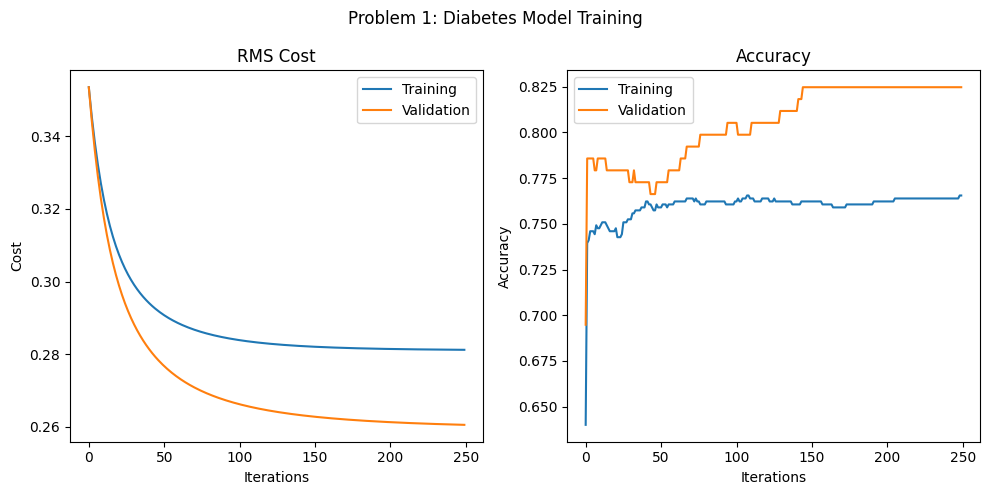

In [26]:
Diabetes_Predictor = LogisticRegression(X_data, Y_data, StandardScaler(),test_size=0.2)
Diabetes_Predictor.train(lmbda=0.0, alpha=0.1, epochs=250)
print(f"Train cost: {Diabetes_Predictor.training_history[-1]}")
print(f"Test cost: {Diabetes_Predictor.test_history[-1]}")

mpl.rcParams['figure.figsize'] = [10,5]

fig, ax = plt.subplots(1,2,sharex=True, squeeze=True)
fig.suptitle("Problem 1: Diabetes Model Training")

Diabetes_Predictor.plot_cost('RMS Cost', ax[0])

Diabetes_Predictor.plot_accuracy('Accuracy', ax[1])
plt.tight_layout()

In [27]:
Y_pred = np.round(Diabetes_Predictor.predict(Diabetes_Predictor.X_test))
print("Problem 1: Diabetes Classifier Metrics\n")
print(f"Accuracy: {metrics.accuracy_score(Diabetes_Predictor.Y_test, Y_pred)}")
print(f"Precision: {metrics.precision_score(Diabetes_Predictor.Y_test, Y_pred)}")
print(f"Recall: {metrics.recall_score(Diabetes_Predictor.Y_test, Y_pred)}")
print(f"F1 Score: {metrics.f1_score(Diabetes_Predictor.Y_test, Y_pred)}")



Problem 1: Diabetes Classifier Metrics

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


Text(0.5, 1.0, 'Problem 1: Diabetes Confusion Matrix')

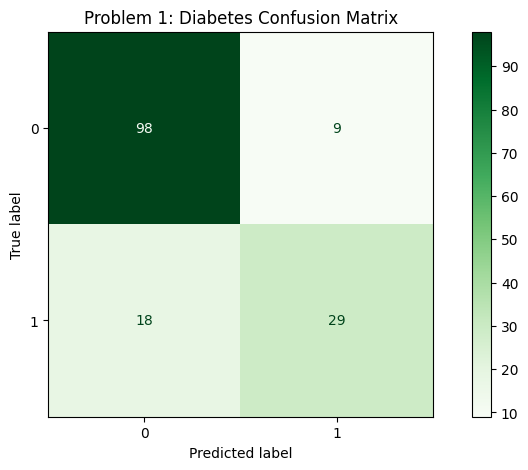

In [28]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true = Diabetes_Predictor.Y_test, 
    y_pred = Y_pred,
    cmap = 'Greens'
    
)

disp.ax_.set_title("Problem 1: Diabetes Confusion Matrix")
#disp.plot()


In [29]:
# from sklearn.linear_model import LogisticRegression

# sklearn_model = LogisticRegression(penalty='l1', solver = 'liblinear', max_iter=250)
# sklearn_model.fit(X_train, Y_train)
# Y_pred = sklearn_model.predict(X_test)

# print("Sklearn's Logistic Regression")
# print(f"Accuracy: {metrics.accuracy_score(Y_test, Y_pred)}")
# print(f"Precision: {metrics.precision_score(Y_test, Y_pred)}")
# print(f"Recall: {metrics.recall_score(Y_test, Y_pred)}")
# print(f"F1 Score: {metrics.f1_score(Y_test, Y_pred)}")
# #confusion matrix
# print(metrics.confusion_matrix(Y_test, Y_pred))

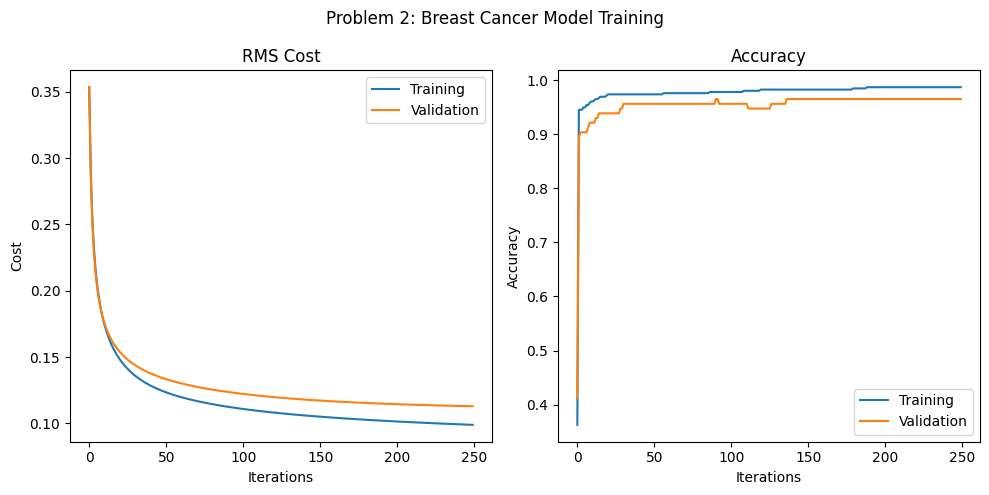

In [30]:
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
Cancer_Predictor = LogisticRegression(breast.data, breast.target, StandardScaler(), test_size=0.2)
Cancer_Predictor.train(lmbda=0.0, alpha=0.1, epochs=250)
#No lambda could be found that improves metrics


fig, ax = plt.subplots(1,2,sharex=True, squeeze=True)
fig.suptitle("Problem 2: Breast Cancer Model Training")
Cancer_Predictor.plot_cost('RMS Cost', ax[0])
Cancer_Predictor.plot_accuracy('Accuracy', ax[1])
plt.tight_layout()

Y_pred_no_penalty = np.round(Cancer_Predictor.predict(Cancer_Predictor.X_test))
f1_score_no_penalty = metrics.f1_score(Cancer_Predictor.Y_test, Y_pred_no_penalty)

In [31]:
Cancer_Predictor.train(lmbda=0.05, alpha=0.1, epochs=250)
Y_pred_penalty = np.round(Cancer_Predictor.predict(Cancer_Predictor.X_test))
f1_score_penalty = metrics.f1_score(Cancer_Predictor.Y_test, Y_pred_penalty)

cancer_metrics = np.array([
    [metrics.accuracy_score(Cancer_Predictor.Y_test, Y_pred_no_penalty), metrics.accuracy_score(Cancer_Predictor.Y_test, Y_pred_penalty)],
    [metrics.precision_score(Cancer_Predictor.Y_test, Y_pred_no_penalty), metrics.precision_score(Cancer_Predictor.Y_test, Y_pred_penalty)],
    [metrics.recall_score(Cancer_Predictor.Y_test, Y_pred_no_penalty), metrics.recall_score(Cancer_Predictor.Y_test, Y_pred_penalty)],
    [f1_score_no_penalty, f1_score_penalty]
])


cancer_percent_improvements = ((cancer_metrics[:,1] - cancer_metrics[:,0]) / cancer_metrics[:,0]) * 100
print(cancer_percent_improvements)
Cancer_Predictor.train(lmbda=0, alpha=0.1, epochs=250)

[-0.90909091 -1.42857143  0.         -0.72992701]


In [32]:
Y_pred = np.round(Cancer_Predictor.predict(Cancer_Predictor.X_test))
print("Problem 2: Breast Cancer Classifier Metrics\n")
print(metrics.classification_report(Cancer_Predictor.Y_test, Y_pred))
# print(f"Accuracy: {metrics.accuracy_score(Cancer_Predictor.Y_test, Y_pred)}")
# print(f"Precision: {metrics.precision_score(Cancer_Predictor.Y_test, Y_pred)}")
# print(f"Recall: {metrics.recall_score(Cancer_Predictor.Y_test, Y_pred)}")
# print(f"F1 Score: {metrics.f1_score(Cancer_Predictor.Y_test, Y_pred)}")

Problem 2: Breast Cancer Classifier Metrics

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1.0, 'Problem 2: Breast Cancer Logistic Confusion Matrix')

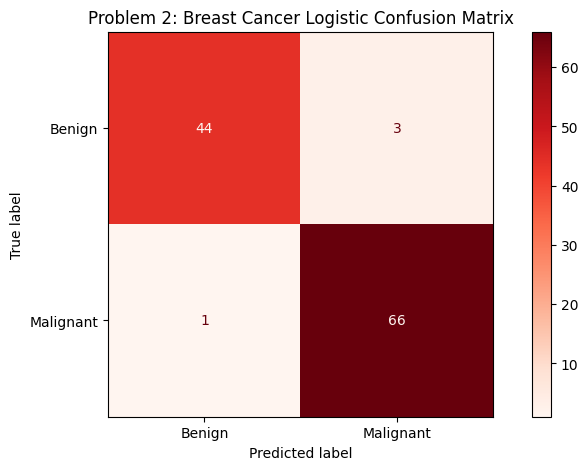

In [33]:
#Replace 0 with benign 1 with malignant
#print(y_true[:10])

disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true = Cancer_Predictor.Y_test, 
    y_pred = Y_pred,
    cmap = 'Reds',
    display_labels = ['Benign', 'Malignant']
)
disp.ax_.set_title("Problem 2: Breast Cancer Logistic Confusion Matrix")

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.93      0.93      0.93        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



Text(0.5, 1.0, 'Problem 3: Breast Cancer Naive Bayes Confusion Matrix')

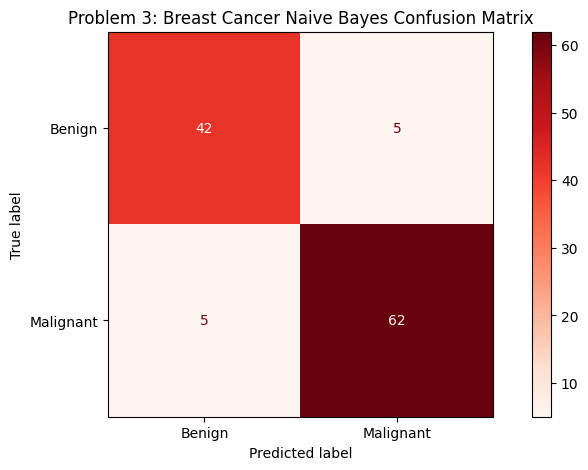

In [34]:
class NGBClassifier(Classifier):
    def __init__(self, *args, **kwargs):
        super(NGBClassifier, self).__init__(*args, **kwargs)
        
        self.J = self.X.shape[1]
        self.K = max(self.Y)+1 #max = 3, 4 total classes
        self.double_variances = np.zeros((self.J,self.K))
        self.means = np.zeros((self.J,self.K))
        self.invsqrs = np.zeros((self.J,self.K))
        self.priors = np.zeros(self.K)
        
        
    def train(self):
        training_data = np.hstack((self.X_train, self.Y_train))
        
        for k in range(0,self.K):
            xk = training_data[training_data[:,-1] == k]
            self.priors[k] = np.log( xk.shape[0] / training_data.shape[0] )
            
            for j in range(0,self.J):
                xkj = xk[:,j]
                self.double_variances[j,k]=2*np.var(xkj)
                if (self.double_variances[j,k]==0):
                    self.double_variances[j,k] = 0.00000000000000000000001
                self.means[j,k] = np.mean(xkj)
                self.invsqrs[j,k] = 1/np.sqrt(np.pi*self.double_variances[j,k])
    def predict(self, X: np.ndarray):
        Y = np.zeros(X.shape[0])
        
        for i, x in enumerate(X):
            pvck = np.zeros(self.K)
            for k in range(0,self.K):
                cur_sum = self.priors[k]
                for j in range(0,self.J):
                    cur_sum += np.log( self.invsqrs[j,k] * np.exp(-np.square(x[j]-self.means[j,k])/self.double_variances[j,k]))
                pvck[k] = cur_sum
            Y[i] = int(np.argmax(pvck))
        return Y

ngb = NGBClassifier(breast.data, breast.target, StandardScaler())
ngb.train()
Y_pred = ngb.predict(ngb.X_test)


print(metrics.classification_report(ngb.Y_test, Y_pred))

disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true = ngb.Y_test, 
    y_pred = Y_pred,
    cmap = 'Reds',
    display_labels = ['Benign', 'Malignant']
)
disp.ax_.set_title("Problem 3: Breast Cancer Naive Bayes Confusion Matrix")
        

In [35]:
from sklearn.naive_bayes import GaussianNB
ngb_sk = GaussianNB()
Y_pred = ngb_sk.fit(ngb.X_train, np.ravel(ngb.Y_train)).predict(ngb.X_test)
print(metrics.classification_report(ngb.Y_test, Y_pred))
print(metrics.confusion_matrix(ngb.Y_test, Y_pred))
# My bayes classifier is a tiny bit better for some reason

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

[[42  5]
 [ 6 61]]
